In [162]:
#決定木とランダムフォレスト（2018年12月〜2019年6月中旬までの糖度を予測）

In [1]:
%matplotlib inline
import sys
sys.path.append('/home/yoshida/.pyenv/versions/3.6.6/lib/python3.6/site-packages')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split

In [2]:
from sklearn.tree import DecisionTreeClassifier # 決定木
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト

In [3]:
# データの読み込み
data = pd.read_csv("../src/Aiko_normalization_ver3_aaa.csv")
df = pd.DataFrame(data)

In [4]:
df.head(5)

,No,current_date,seed_date,house,sweet,sweet_category,width,height,size,url,...,AveSatu_7,AveHum_7,AveTemp_7,AveMaxTemp_7,AveMinTemp_7,AveDiffTemp_7,SumMaxTemp_7,SumMinTemp_7,SumDiffTemp_7,COL_21
0,1,11月28日,3月13日,2,4.3,2,2.6,2.9,7.54,https://firebasestorage.googleapis.com/v0/b/ap...,...,6.17,66.84,21.14,26.24,18.83,7.41,183.7,131.8,51.9,NaN
1,2,11月28日,3月13日,2,4.5,2,2.4,2.7,6.48,https://firebasestorage.googleapis.com/v0/b/ap...,...,6.17,66.84,21.14,26.24,18.83,7.41,183.7,131.8,51.9,NaN
2,3,11月28日,3月13日,2,4.0,1,2.8,3.1,8.68,https://firebasestorage.googleapis.com/v0/b/ap...,...,6.17,66.84,21.14,26.24,18.83,7.41,183.7,131.8,51.9,NaN
3,4,11月28日,3月13日,2,3.5,1,3.0,3.5,10.50,https://firebasestorage.googleapis.com/v0/b/ap...,...,6.17,66.84,21.14,26.24,18.83,7.41,183.7,131.8,51.9,NaN
4,5,11月28日,3月13日,2,4.3,2,2.5,2.8,7.00,https://firebasestorage.googleapis.com/v0/b/ap...,...,6.17,66.84,21.14,26.24,18.83,7.41,183.7,131.8,51.9,NaN


In [5]:
# 'AveCO2_7', 'AveSatu_7', 'AveHum_7', 'AveTemp_7', 'AveMaxTemp_7', 'AveMinTemp_7','AveDiffTemp_7','SumMaxTemp_7','SumMinTemp_7','SumDiffTemp_7'

In [6]:
df.drop(['No','width','height','seed_date','house','url', 'COL_21'], axis=1, inplace=True) #対象の列を削除

In [7]:
# AveDiffTemp_7、AveSatu_7、monthを対象としたい時
df.drop(['AveDiffTemp_7', 'AveCO2_7', 'AveSatu_7', 'AveMaxTemp_7', 'AveMinTemp_7', 'SumMaxTemp_7','SumMinTemp_7','SumDiffTemp_7'], axis=1, inplace=True)

In [8]:
df.head()

,current_date,sweet,sweet_category,size,AveHum_7,AveTemp_7
0,11月28日,4.3,2,7.54,66.84,21.14
1,11月28日,4.5,2,6.48,66.84,21.14
2,11月28日,4.0,1,8.68,66.84,21.14
3,11月28日,3.5,1,10.50,66.84,21.14
4,11月28日,4.3,2,7.00,66.84,21.14


In [9]:
df['month'] = df['current_date'].str[:2] # "11月28日"とか"4月3日"の月日の先頭2文字だけ抽出
df['month'] = df['month'].str.strip('月') # このままだと"4月"のように"月"が入っているので、"月"を削除する
# 参考：https://deepage.net/features/pandas-str-extract.html
# 参考：https://deepage.net/features/pandas-str-replace.html
df['month'].isnull().sum() # 欠損値がないかを確認

df.drop(['current_date'], axis=1, inplace=True) # current_dateはもう使わない
print(df.shape)

(2176, 6)


In [10]:
# 四半期を求める(4~6月:1st、7~9月:2nd、10~12月:3rd、1~3月:4th)(＊＊＊＊使うか使わないか＊＊＊＊)
df['quarter'] = df['month'].replace({'4': '1st', '5': '1st', '6': '1st', 
                                     '7': '2nd', '8': '2nd', '9': '2nd', 
                                     '10': '3rd', '11': '3rd', '12': '3rd', 
                                     '1': '4th', '2': '4th', '3': '4th'
                                    })

In [11]:
df.head(3)

,sweet,sweet_category,size,AveHum_7,AveTemp_7,month,quarter
0,4.3,2,7.54,66.84,21.14,11,3rd
1,4.5,2,6.48,66.84,21.14,11,3rd
2,4.0,1,8.68,66.84,21.14,11,3rd


In [12]:
# ダミー変数の作成
df = pd.get_dummies(df, columns=['quarter'], drop_first=True)

In [13]:
df.head()

,sweet,sweet_category,size,AveHum_7,AveTemp_7,month,quarter_3rd,quarter_4th
0,4.3,2,7.54,66.84,21.14,11,1,0
1,4.5,2,6.48,66.84,21.14,11,1,0
2,4.0,1,8.68,66.84,21.14,11,1,0
3,3.5,1,10.50,66.84,21.14,11,1,0
4,4.3,2,7.00,66.84,21.14,11,1,0


In [14]:
y = df["sweet_category"] #目的変数
df.drop(['sweet','sweet_category'], axis=1, inplace=True) #目的変数の列を削除
print(df.shape)

(2176, 6)


In [15]:
df.drop(['month'], axis=1, inplace=True)

In [16]:
# 訓練セットとテストセットに分割
#X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify=y, random_state=0)
#stratify は母集団のカテゴリの割合を保って分割するもので、目的変数を指定するのが一般的
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(df, y, test_size=0.3, random_state=0, stratify=y)

In [17]:
# ハイパーパラメータ
params = {'n_estimators' : [3, 10, 100, 1000], 'max_depth' : [2, 4, 6, 8], 'n_jobs': [-1]}

In [18]:
# モデルのインスタンス生成
rf = RandomForestClassifier()

In [19]:
from sklearn.model_selection import GridSearchCV
# ハイパーパラメータ探索
grid_search = GridSearchCV(rf, params, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_trainval, y_trainval)

/home/yoshida/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [3, 10, 100, 1000], 'max_depth': [2, 4, 6, 8], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [20]:
# グリッドサーチの結果
print('Best cross-validation: {}'.format(round(grid_search.best_score_, 3)))
print('Best parameters : {}'.format(grid_search.best_params_))
print('Test set score : {}'.format(round(grid_search.score(X_test, y_test), 3)))

Best cross-validation: 0.754
Best parameters : {'max_depth': 8, 'n_estimators': 1000, 'n_jobs': -1}
Test set score : 0.763


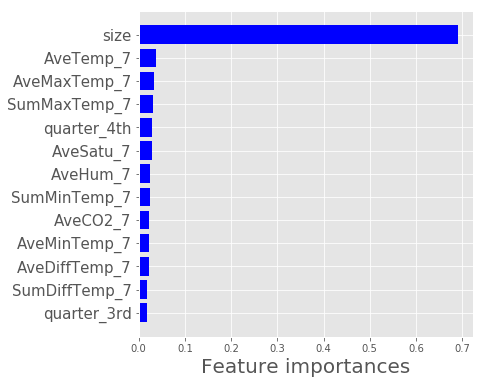

In [20]:
# ランダムフォレストには、特徴量の重要度を取得するツールがあるので、それを使ってグラフ化する
features = X_train.columns #Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
importance = rnd_forest.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize = (6, 6))
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices], fontsize=15)
plt.xlabel("Feature importances", fontsize=20)
plt.show()

In [21]:
# ランダムフォレストでは、AveSatu_7、AveHum_7、AveDiffTemp_7、monthを使ったときに、一番精度がよくなった（67.0%、66.9%）
# しかし、以下のヒートマップからわかるように、AveSatu_7とAveHum_7は一緒に使ってはいけない(相関が大きすぎるから)
# AveSatu_7、AveDiffTemp_7、monthを使ったときの精度（66.1%、66.6%）
# AveHum_7、AveDiffTemp_7、monthを使ったときの精度（66.3%、66.6%）
# 正直どっちもそんなに変わらなかった

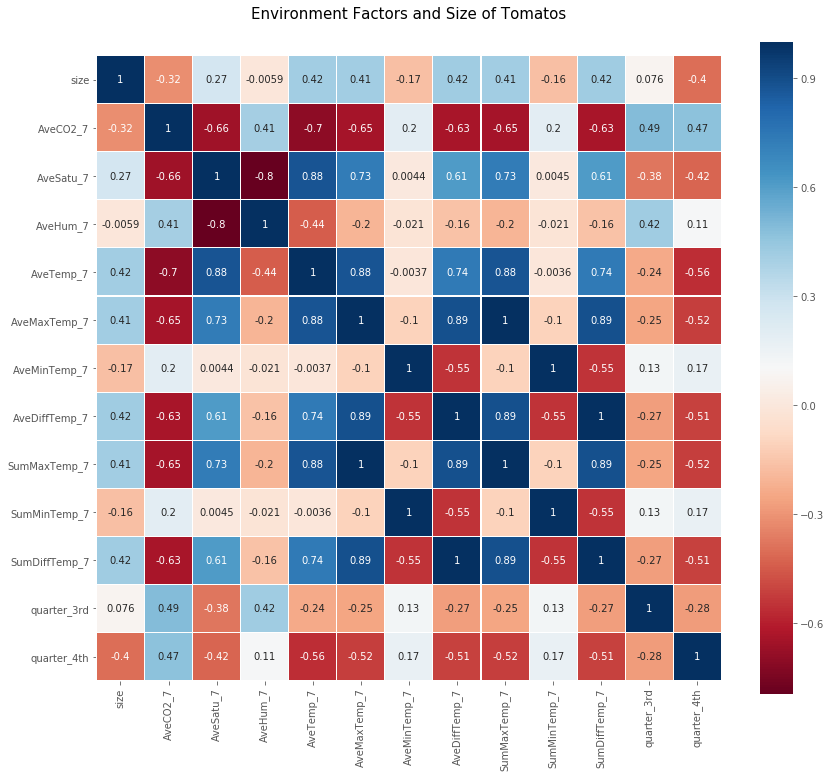

In [22]:
# 特徴量同士の相関をヒートマップで確認
# ヒートマップを見れば解るが、"Parch"と"FamilySize"が比較的相関が高めであるが、そのままにしておく

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Environment Factors and Size of Tomatos', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)